In [13]:
import pandas as pd
import numpy as np

In [14]:
df  = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


 Q1 . ##Data cleaning

In [15]:
df["Title"] = df["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())
df["Title"].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [16]:
df["Title"].replace(["Dr","Col","Rev","Ms","Dona"],"Other",inplace=True)
df["Title"].value_counts()

C:\Users\rauna\AppData\Local\Temp\ipykernel_5964\2624848360.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Title"].replace(["Dr","Col","Rev","Ms","Dona"],"Other",inplace=True)


Title
Mr        240
Miss       78
Mrs        72
Master     21
Other       7
Name: count, dtype: int64

In [17]:
df['Age'] = df['Age'].clip(lower=1)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Age'] = df['Age'].astype(int)
df["Age"] == "NaN"

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Age, Length: 418, dtype: bool

In [18]:
df['Fare'].fillna(df['Fare'].median(),inplace=True)

C:\Users\rauna\AppData\Local\Temp\ipykernel_5964\1007884036.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].median(),inplace=True)


In [19]:
df['Cabin'].dropna().str.isalnum().sum()
mode = df["Cabin"].mode()[0]
df["Cabin"] = df["Cabin"].fillna(mode)

In [20]:
print("\n" + 15 * "-" + "Missing Values".center(15) + 15 * "-")
print(df.isnull().sum())


--------------- Missing Values---------------
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64


In [21]:
gender_mapping = {"male": 0, "female": 1}
df["Sex"] = df["Sex"].map(gender_mapping)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,0,3,"Kelly, Mr. James",0,34,0,0,330911,7.8292,B57 B59 B63 B66,Q,Mr
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7.0000,B57 B59 B63 B66,S,Mrs
2,894,0,2,"Myles, Mr. Thomas Francis",0,62,0,0,240276,9.6875,B57 B59 B63 B66,Q,Mr
3,895,0,3,"Wirz, Mr. Albert",0,27,0,0,315154,8.6625,B57 B59 B63 B66,S,Mr
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12.2875,B57 B59 B63 B66,S,Mrs


Q2 : Apply data pre-processing techniques such as standardization/normalization, transformation, 
aggregation, discretization/binarization, sampling etc. on any dataset(iris dataset in this case)

In [91]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, KBinsDiscretizer,Binarizer
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.utils import resample


In [79]:
iris = load_iris()
X, y = iris.data, iris.target


In [81]:
# Standardization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
df_standardized = pd.DataFrame(X_standardized, columns=iris.feature_names)
df_standardized.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [83]:
# Normalization
min_max_scaler = MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X)
df_normalized = pd.DataFrame(X_normalized, columns=iris.feature_names)
df_normalized.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [85]:
# Discretization
kbins_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
X_discretized = kbins_discretizer.fit_transform(X)
df_discretized = pd.DataFrame(X_discretized, columns=iris.feature_names)
df_discretized.head()

C:\Users\rauna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [88]:
# Aggregation (KMeans clustering)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
X_clustered = kmeans.labels_
df_clustered = pd.DataFrame({'Cluster': X_clustered})
df_clustered.head()

,Cluster
0,1
1,1
2,1
3,1
4,1


In [90]:
# Feature Selection (SelectKBest using chi-squared test)
selector = SelectKBest(chi2, k=2)
X_selected = selector.fit_transform(X, y)
df_selected = pd.DataFrame(X_selected, columns=['Feature1', 'Feature2'])
df_selected.head()

,Feature1,Feature2
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [93]:
# Binarization
binarizer = Binarizer(threshold=3.0)  # Example threshold
X_binarized = binarizer.fit_transform(X)
df_binarized = pd.DataFrame(X_binarized, columns=iris.feature_names)
df_binarized.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0
3,1.0,1.0,0.0,0.0
4,1.0,1.0,0.0,0.0


In [94]:
# Sampling (random sampling with replacement)
X_resampled, y_resampled = resample(X, y, replace=True, random_state=42, n_samples=50)  # Example size
df_resampled = pd.DataFrame(X_resampled, columns=iris.feature_names)
df_resampled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,7.1,3.0,5.9,2.1
1,5.8,2.6,4.0,1.2
2,5.8,4.0,1.2,0.2
3,4.9,2.5,4.5,1.7
4,6.1,2.8,4.0,1.3


Q3. Run Apriori algorithm to find frequent item sets and association rules on 2 real datasets and use 
appropriate evaluation measures to compute correctness of obtained patterns
a) Use minimum support as 50% and minimum confidence as 75%
b) Use minimum support as 60% and minimum confidence as 60 %

In [28]:
from apyori import apriori

In [29]:
dataset_a = [
    ['Milk', 'Bread', 'Eggs'],
    ['Milk', 'Diapers', 'Beer', 'Bread'],
    ['Milk', 'Coffee', 'Diapers', 'Beer'],
    ['Diapers', 'Beer', 'Bread', 'Eggs'],
    ['Bread', 'Eggs'],
    ['Milk', 'Bread', 'Diapers', 'Beer']
]

dataset_b = [
    ['Apple', 'Banana', 'Orange'],
    ['Apple', 'Banana'],
    ['Apple', 'Banana', 'Orange', 'Grapes'],
    ['Apple', 'Grapes'],
    ['Banana', 'Orange', 'Grapes']
]

In [33]:
# Function to run Apriori algorithm and print association rules
def run_apriori(dataset, min_support, min_confidence):
    association_rules = apriori(dataset, min_support=min_support, min_confidence=min_confidence)
    results = list(association_rules)
    return results

In [34]:
def display_results(results):
    rows = []
    for result in results:
        row = {
            "Items": ", ".join([item for item in result.items]),
            "Support": round(result.support, 4),
            "Confidence": round(result.ordered_statistics[0].confidence, 4),
            "Lift": round(result.ordered_statistics[0].lift, 4)
        }
        rows.append(row)
    df = pd.DataFrame(rows)
    return df

In [35]:
# Evaluation function
def evaluate(dataset, min_support, min_confidence):
    print(f"Evaluating dataset with minimum support={min_support} and minimum confidence={min_confidence}")
    results = run_apriori(dataset, min_support, min_confidence)
    if results:
        df = display_results(results)
        display(df)
    else:
        print("No association rules found.")

In [36]:
# Evaluation
evaluate(dataset_a, min_support=0.5, min_confidence=0.75)
evaluate(dataset_b, min_support=0.6, min_confidence=0.6)

Evaluating dataset with minimum support=0.5 and minimum confidence=0.75


,Items,Support,Confidence,Lift
0,Bread,0.8333,0.8333,1.000
1,"Beer, Bread",0.5000,0.7500,0.900
2,"Beer, Diapers",0.6667,1.0000,1.500
3,"Beer, Milk",0.5000,0.7500,1.125
4,"Diapers, Bread",0.5000,0.7500,0.900
5,"Eggs, Bread",0.5000,1.0000,1.200
6,"Milk, Bread",0.5000,0.7500,0.900
7,"Diapers, Milk",0.5000,0.7500,1.125
8,"Beer, Diapers, Bread",0.5000,0.7500,1.500
9,"Beer, Diapers, Milk",0.5000,0.7500,1.500


Evaluating dataset with minimum support=0.6 and minimum confidence=0.6


,Items,Support,Confidence,Lift
0,Apple,0.8,0.8,1.0
1,Banana,0.8,0.8,1.0
2,Grapes,0.6,0.6,1.0
3,Orange,0.6,0.6,1.0
4,"Apple, Banana",0.6,0.6,1.0
5,"Orange, Banana",0.6,0.6,1.0


Q4:Use Naive bayes, K-nearest, and Decision tree classification algorithms and build classifiers on 
any two datasets. Divide the data set into training and test set. Compare the accuracy of the 
different classifiers under the following situations:

I. a) Training set = 75% Test set = 25% b) Training set = 66.6% (2/3rd of total), Test set = 33.3%

II. Training set is chosen by i) hold out method ii) Random subsampling iii) Cross-Validation. 
Compare the accuracy of the classifiers obtained. Data needs to be scaled to standard format.

In [141]:
from sklearn.datasets import load_iris, load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [142]:
# Load datasets
iris = load_iris()
wine = load_wine()

In [151]:
datasets = {
    "Iris": iris,
    "Wine": wine
}

classifiers = {
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}



In [152]:
# Function to scale data
def scale_data(X, y=None):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    if y is not None:
        return X_scaled, y
    else:
        return X_scaled

In [153]:
# Function to evaluate classifiers
def evaluate_classifiers(X_train, X_test, y_train, y_test, cv, dataset_name, silent=False):
    accuracies = []
    for clf_name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        if not silent:
            print(f"{clf_name} Accuracy ({dataset_name}): {accuracy:.4f}")
    if cv:
        for clf_name, clf in classifiers.items():
            cv_scores = cross_val_score(clf, X_train, y_train, cv=cv)
            mean_accuracy = cv_scores.mean()
            print(f"{clf_name} Mean Accuracy ({dataset_name}, Cross-validation): {mean_accuracy:.4f}")
    return accuracies

In [154]:
# Function to perform classification under different training set selection methods
def compare_classifiers(dataset_name, train_method, cv=None):
    dataset = datasets[dataset_name]
    X, y = dataset.data, dataset.target
    
    if train_method == "holdout":
        for situation in ["75%-25%", "2/3 (66.6%)-1/3 (33.3%)"]:
            print(f"\nSituation: Training set = {situation}")
            if cv:
                X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)
            else:
                X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=2/3, test_size=1/3, random_state=42)
            X_train_scaled, X_test_scaled = scale_data(X_train), scale_data(X_test)
            evaluate_classifiers(X_train_scaled, X_test_scaled, y_train, y_test, cv, dataset_name)
        
    elif train_method == "random_subsampling":
        for situation in ["75%-25%", "2/3 (66.6%)-1/3 (33.3%)"]:
            print(f"\nSituation: Training set = {situation}")
            accuracies = []
            for _ in range(5):  # Perform 5 iterations of random subsampling
                if cv:
                    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=None)
                else:
                    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=2/3, test_size=1/3, random_state=None)
                X_train_scaled, X_test_scaled = scale_data(X_train), scale_data(X_test)
                accuracies.extend(evaluate_classifiers(X_train_scaled, X_test_scaled, y_train, y_test, cv=None, dataset_name=dataset_name, silent=True))
            if accuracies:  # Check if accuracies list is not empty
                print(f"Average Accuracy ({dataset_name}, Random Subsampling): {sum(accuracies) / len(accuracies):.4f}")
        
    elif train_method == "cross_validation":
        for situation in ["75%-25%", "2/3 (66.6%)-1/3 (33.3%)"]:
            print(f"\nSituation: Training set = {situation}")
            X_scaled, y_scaled = scale_data(X, y)  # Scale entire dataset for cross-validation
            for clf_name, clf in classifiers.items():
                cv_scores = cross_val_score(clf, X_scaled, y_scaled, cv=5)  # Using 5-fold cross-validation
                mean_accuracy = cv_scores.mean()
                print(f"{clf_name} Mean Accuracy ({dataset_name}, Cross-validation): {mean_accuracy:.4f}")
        print("\n")


In [155]:
# Comparing classifiers under different training set selection methods
for dataset_name in datasets.keys():
    print(f"Dataset: {dataset_name}\n")
    
    # Holdout method
    print("Holdout Method:")
    compare_classifiers(dataset_name, "holdout")
    
    # Random subsampling method
    print("\nRandom Subsampling Method:")
    compare_classifiers(dataset_name, "random_subsampling")
    
    # Cross-validation method
    print("Cross-validation Method:")
    compare_classifiers(dataset_name, "cross_validation")

Dataset: Iris

Holdout Method:

Situation: Training set = 75%-25%
Naive Bayes Accuracy (Iris): 0.9600
KNN Accuracy (Iris): 0.9800
Decision Tree Accuracy (Iris): 0.9600

Situation: Training set = 2/3 (66.6%)-1/3 (33.3%)
Naive Bayes Accuracy (Iris): 0.9600
KNN Accuracy (Iris): 0.9800
Decision Tree Accuracy (Iris): 0.9600

Random Subsampling Method:

Situation: Training set = 75%-25%
Average Accuracy (Iris, Random Subsampling): 0.9320

Situation: Training set = 2/3 (66.6%)-1/3 (33.3%)
Average Accuracy (Iris, Random Subsampling): 0.9107
Cross-validation Method:

Situation: Training set = 75%-25%
Naive Bayes Mean Accuracy (Iris, Cross-validation): 0.9533
KNN Mean Accuracy (Iris, Cross-validation): 0.9600
Decision Tree Mean Accuracy (Iris, Cross-validation): 0.9667

Situation: Training set = 2/3 (66.6%)-1/3 (33.3%)
Naive Bayes Mean Accuracy (Iris, Cross-validation): 0.9533
KNN Mean Accuracy (Iris, Cross-validation): 0.9600
Decision Tree Mean Accuracy (Iris, Cross-validation): 0.9667


Datase

Q5 : Use Simple K-means algorithm for clustering on any dataset. Compare the performance of 
clusters by changing the parameters involved in the algorithm. Plot MSE computed after each 
iteration using a line plot for any set of parameters

In [74]:
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [62]:
# Function to perform K-means clustering and compute MSE after each iteration
def kmeans_clustering(X, n_clusters, max_iter):
    kmeans = KMeans(n_clusters=n_clusters, max_iter=max_iter, random_state=0)
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    mse = []
    for i in range(1, max_iter + 1):
        kmeans = KMeans(n_clusters=n_clusters, max_iter=i, random_state=0)
        kmeans.fit(X)
        centroids = kmeans.cluster_centers_
        labels = kmeans.labels_
        mse.append(mean_squared_error(X, centroids[labels]))
    return mse


In [76]:
# Load the Iris dataset
iris = load_iris()
X = iris.data

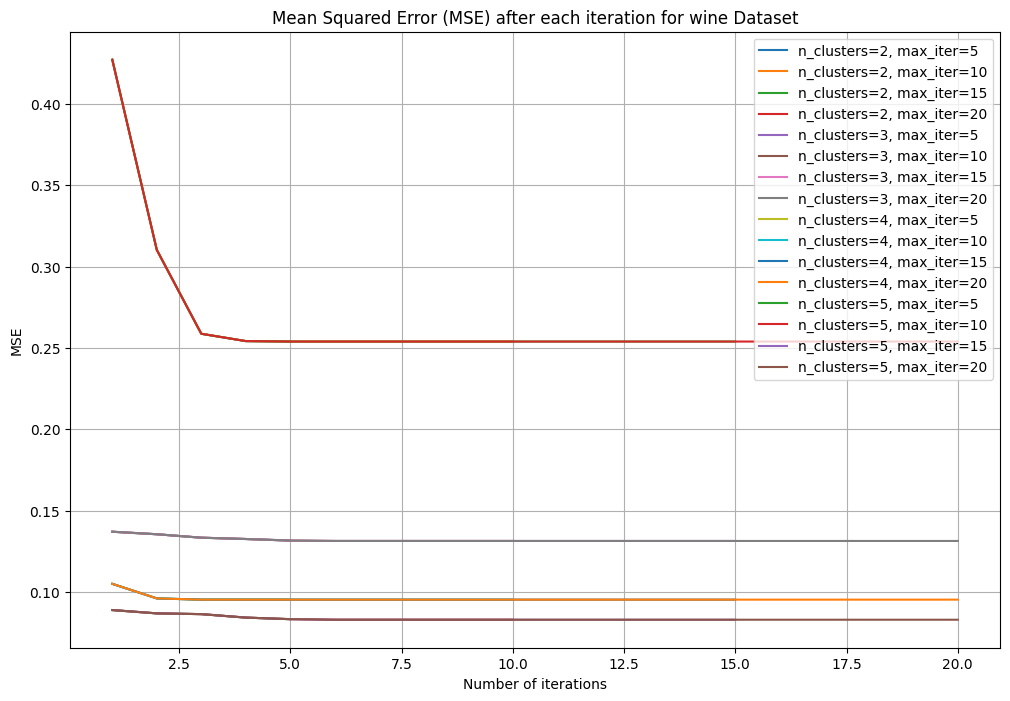

In [77]:
# Perform K-means clustering with different parameters
n_clusters_list = [2, 3, 4, 5]  # Number of clusters
max_iter_list = [5, 10, 15, 20]  # Maximum number of iterations
plt.figure(figsize=(12, 8))

for n_clusters in n_clusters_list:
    for max_iter in max_iter_list:
        mse = kmeans_clustering(X, n_clusters, max_iter)
        plt.plot(range(1, max_iter + 1), mse, label=f'n_clusters={n_clusters}, max_iter={max_iter}')

plt.title('Mean Squared Error (MSE) after each iteration for wine Dataset')
plt.xlabel('Number of iterations')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()